# MySIR

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Wed Apr  8 13:57:07 2020


In [3]:
import numpy as np
import pandas as pd
import matplotlib

In [4]:
fontsize=14
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }
plt.rcParams["font.size"     ] = fontsize


In [5]:
#from scipy.integrate import odeint
#import scipy.integrate as spi
#from scipy.interpolate import interp1d

In [6]:
#from dataclasses import dataclass, field

In [7]:
#from c19.types import SIR, SEIR

In [8]:
#import c19.basic_models as cbm
#import c19.core_functions as cf
#import c19.plotting as cplt
#import c19.utils as ut

In [9]:
import c19.kfmysir as kfmsir

## My Sir Model


$$
\frac{dS}{dt} = - \beta \frac{S}{N} I \\
\frac{dI}{dt} = \beta  \frac{S}{N} I - \gamma I - \rho I \\
\frac{dR}{dt} = \gamma I \\
\frac{dD}{dt} = \rho I \\
$$


And $H$

$$
H_{i} = \begin{pmatrix} \beta \frac{S}{N}   & - 1 & - 1 \\
                              0         &   1 &   0 \\
                              0         &   0 &   1 \end{pmatrix} I_{i-1} \Delta t
$$

## Generate samples

In [10]:
N                = 1e6
Beta, Gamma, Phi = 0.70, 0.2, 0.02

In [11]:
xt = np.array((Beta, Gamma, Phi))

In [12]:
ts, cs, ns = kfmsir.mysir_rvs(N, xt)

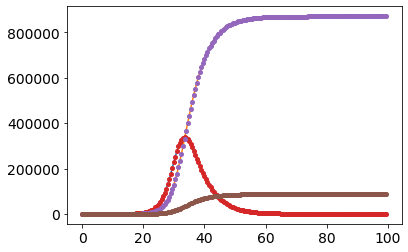

In [13]:
plt.plot(ts, cs);
plt.plot(ts, ns, marker='o', ls='', ms = 4);

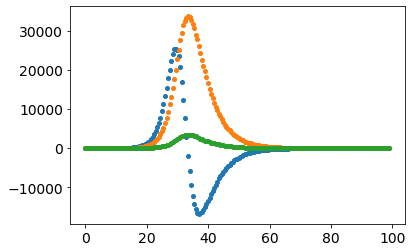

In [14]:
ms, ums = kfmsir.delta_ms(ns)
plt.plot(ts[:-1], ms, marker = 'o', ls = '', ms = 4.);

In [15]:
hs = kfmsir.hs_(ts, ns, N, kfmsir.mysir_hi)
print(len(hs))
print(hs[0])
print(hs[100])

199
[[ 0.4999995 -0.5       -0.5      ]
 [ 0.         0.5        0.       ]
 [ 0.         0.         0.5      ]]
[[   597.255632 -13028.       -13028.      ]
 [     0.        13028.            0.      ]
 [     0.            0.        13028.      ]]


In [16]:
x0 = np.array((1., 1., 1.))
xs, uxs = kfmsir.mysir_kf(ts, ns, x0, N)

x-best :  [0.69951605 0.19968628 0.02010066]
x-true :  [0.7  0.2  0.02]


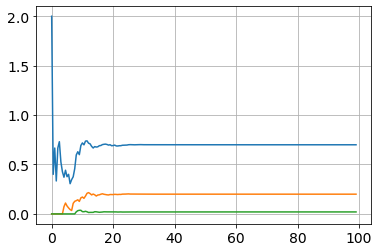

In [17]:
plt.plot(ts[:-1], xs);
plt.grid();
print('x-best : ', xs[190]);
print('x-true : ', xt)

## SIR model


The differential equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

$$
\frac{dS}{dt} = - \frac{\beta S I}{N} \\
\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I \\
\frac{dR}{dt} = \gamma R (I?)
$$


And $H$

$$
H_{i} = \begin{pmatrix} \beta \frac{S}{N}   & - 1 \\
                              0         &   1  \end{pmatrix} I_{i-1} \Delta t
$$

In [18]:
N                = 1e6
Beta, Gamma      = 0.70, 0.2

xt = np.array((Beta, Gamma))

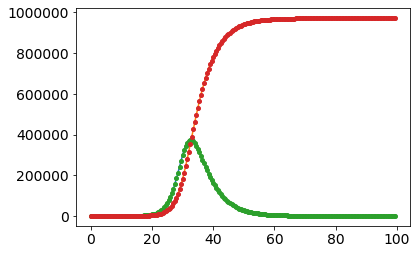

In [19]:
ts, cs, ns = kfmsir.sir_rvs(N, xt)
plt.plot(ts, cs);
plt.plot(ts, ns, marker='o', ls='', ms = 4);

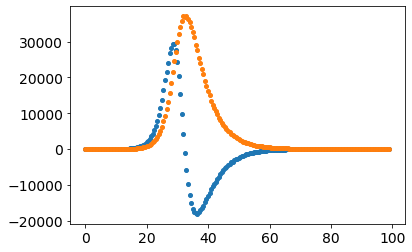

In [20]:
ms, ums = kfmsir.delta_ms(ns)
plt.plot(ts[:-1], ms, marker = 'o', ls = '', ms = 4.);

In [21]:
x0 = np.array((1., 1.))
xs, uxs = kfmsir.sir_kf(ts, ns, x0, N)

x-best :  [0.6998595  0.19927011]
x-true :  [0.7 0.2]


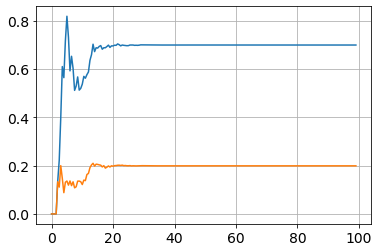

In [22]:
plt.plot(ts[:-1], xs);
plt.grid();
print('x-best : ', xs[190]);
print('x-true : ', xt)

## SEIR model - complete

$$
\frac{dS}{dt} = - \beta S I \\
\frac{dE}{dt} = \beta S I - \sigma E \\
\frac{dI}{dt} = \sigma E - \gamma I \\
\frac{dR}{dt} = \gamma I
$$


And $H$

$$
H_{i} = \begin{pmatrix} \beta \frac{S}{N}  I_{i-1}  & 0        &  - E_{i-1} \\
                                              0     & -I_{i-1} &    E_{i+1} \\
                                              0     &  I_{i-1} &  0        \end{pmatrix} \Delta t
$$

In [23]:
N                 = 1e6 #4.7e+7
R0, Gamma, Sigma  = 3.5, 1./5., 1./5
Beta              = R0 * Gamma

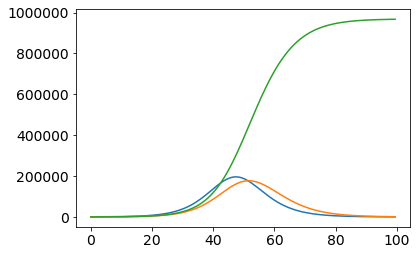

In [24]:
xt = np.array((Beta, Gamma, Sigma))
ts, cs, ns = kfmsir.seir_rvs(N, xt, ci=(200, 200, 0))
plt.plot(ts, cs);
#plt.plot(ts, ns, marker='o', ls='', ms = 4);

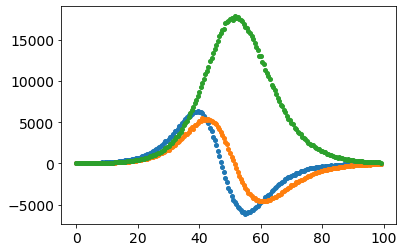

In [25]:
ms, ums = kfmsir.delta_ms(ns)
plt.plot(ts[:-1], ms, marker = 'o', ls = '', ms = 4.);

x-best :  [0.69892657 0.19947746 0.1994988 ]
x-true :  [0.7 0.2 0.2]


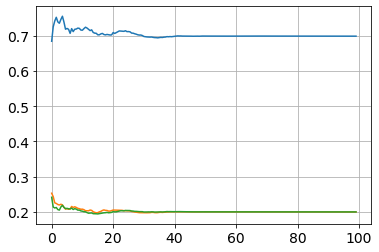

In [26]:
x0 = np.array((1., 1., 1.))
xs, uxs = kfmsir.seir_kf(ts, ns, x0, N)
plt.plot(ts[:-1], xs);
plt.grid();
print('x-best : ', xs[190]);
print('x-true : ', xt)

## SEIR2 model 



- We expand the SEIR model to include de population of deceased. The equations are.

$$
\frac{dS}{dt} = - \frac{\beta}{N} S I \\
\frac{dE}{dt} = \frac{\beta}{N} I - \sigma E \\
\frac{dI}{dt} = \sigma E - \gamma I \\
\frac{dR}{dt} = (1 - \phi) \gamma I \\
\frac{dD}{dt} = \phi \gamma I -g D \\
M =g D \\
P = gD - \lambda P
$$


And $H$

$$
H_{i} = \begin{pmatrix} \beta \frac{S}{N}  I_{i-1}  & 0        &  - E_{i-1} & 0        & 0\\
                                              0     & -I_{i-1} &    E_{i+1} & 0         & 0 \\
                                              0     &  I_{i-1} & 0          &  -I_{i-1} &  0   \\
                                              0     &  0 & 0          &  I_{i-1} &  -D_{i-1}       \end{pmatrix} \Delta t
$$

In [27]:
N                     = 1e6 #4.7e+7
R0, Gamma, Sigma, Rho = 3.5, 1./5., 1./5, 1./7.
Phi                   = 0.01 # 0.01
Beta                  = R0  * Gamma
PhiGamma              = Phi * Gamma 

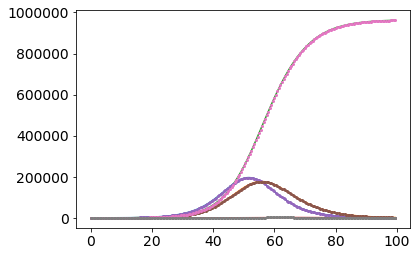

In [28]:
xt = np.array((Beta, Gamma, Sigma, PhiGamma, Rho))
ts, cs, ns = kfmsir.seir2_rvs(N, xt, ci = (100, 100, 0, 0))
plt.plot(ts, cs);
plt.plot(ts, ns, marker='o', ls='', ms = 2);

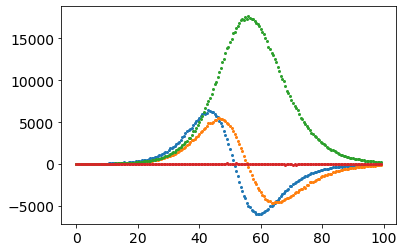

In [29]:
ms, ums = kfmsir.delta_ms(ns)
plt.plot(ts[:-1], ms, marker = 'o', ls = '', ms = 2.);

x-best :  [0.70223847 0.20055026 0.20005507 0.00205331 0.14358806]
x-true :  [0.7        0.2        0.2        0.002      0.14285714]


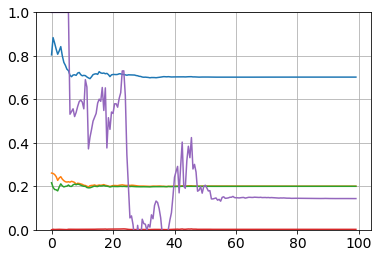

In [30]:
x0 = np.array((1., 1., 1., 1., 1.))
xs, uxs = kfmsir.seir2_kf(ts, ns, x0, N)
plt.plot(ts[:-1], xs); plt.ylim(0., 1.);
plt.grid();
print('x-best : ', xs[190]);
print('x-true : ', xt)

## SIR2 without exposed individuals in the sample


- We expand the SEIR model to include de population of deceased. The equations are.

$$
\frac{dS}{dt} = - \beta \frac{S}{N}  I \\
\frac{dI}{dt} = \beta \frac{S}{N} I - \gamma I \\
\frac{dR}{dt} = (1 - \phi) \gamma I \\
\frac{dD}{dt} = \phi \gamma I -g D \\
$$


And $H$

$$
H_{i} = \begin{pmatrix}  \frac{S}{N}  I_{i-1} &    -I_{i+1} & 0         & 0  \\
                         0     &  I_{i-1} &  -I_{i-1} &  0    \\
                         0     &  0       &  I_{i-1} &  -D_{i-1}   \end{pmatrix} \Delta t
$$

In [31]:
N                     = 1e6 #4.7e+7
R0, Gamma, Sigma, Rho = 3.5, 1./5., 1./5, 1./7.
Phi                   = 0.01 # 0.01
Beta                  = R0  * Gamma
PhiGamma              = Phi * Gamma 

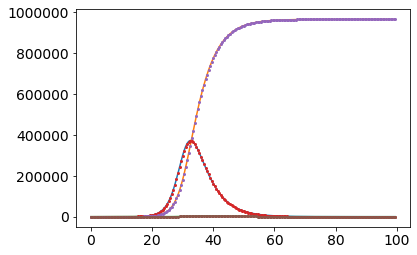

In [32]:
xt = np.array((Beta, Gamma, PhiGamma, Rho))
ts, cs, ns = kfmsir.sir2_rvs(N, xt, ci = (1, 0, 0))
plt.plot(ts, cs);
plt.plot(ts, ns, marker='o', ls='', ms = 2);

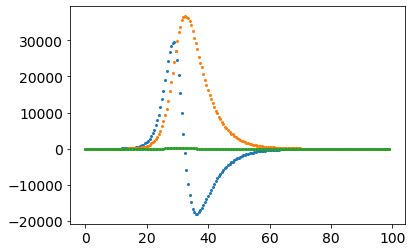

In [33]:
ms, ums = kfmsir.delta_ms(ns)
plt.plot(ts[:-1], ms, marker = 'o', ls = '', ms = 2.);

x-best :  [0.70209069 0.20086025 0.00194183 0.12998219]
x-true :  [0.7        0.2        0.002      0.14285714]


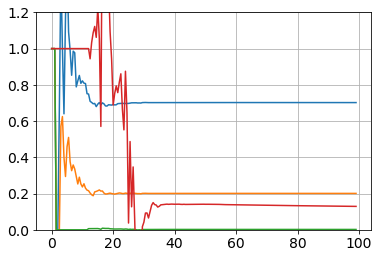

In [34]:
x0 = np.array((1., 1., 1., 1.))
xs, uxs = kfmsir.sir2_kf(ts, ns, x0, N)
plt.plot(ts[:-1], xs);
plt.grid();
print('x-best : ', xs[190]); plt.ylim(0., 1.2);
print('x-true : ', xt)


## SIR2c with death people


- We expand the SEIR model to include de population of deceased. The equations are.

$$
\frac{dS}{dt} = - \beta \frac{S}{N}  I \\
\frac{dI}{dt} = \beta \frac{S}{N} I - \gamma I \\
\frac{dR}{dt} = (1 - \phi) \gamma I \\
\frac{dD}{dt} = \phi \gamma I -g D \\
\frac{dM}{dt} = g D 
$$


And $H$

$$
H_{i} = \begin{pmatrix}  \frac{S}{N}  I_{i-1} &    -I_{i+1} & 0         & 0  \\
                         0     &  I_{i-1} &  -I_{i-1} &  0    \\
                         0     &  0       &  I_{i-1} &  -D_{i-1}   \\ 
                         0     &  0       &  I_{i-1} &  D_{i-1}    \end{pmatrix} \Delta t
$$

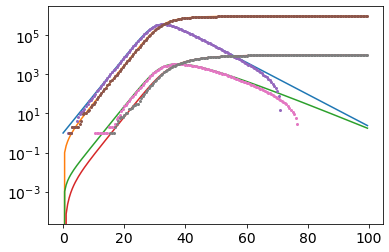

In [35]:
xt = np.array((Beta, Gamma, PhiGamma, Rho))
ts, cs, ns = kfmsir.sir2c_rvs(N, xt, ci = (1, 0, 0, 0))
plt.plot(ts, cs);
plt.plot(ts, ns, marker='o', ls='', ms = 2); plt.yscale('log');

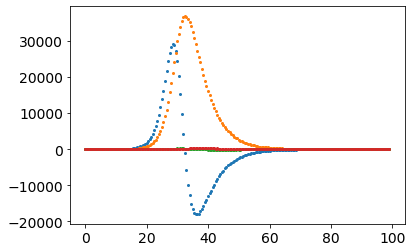

In [36]:
ms, ums = kfmsir.delta_ms(ns)
plt.plot(ts[:-1], ms, marker = 'o', ls = '', ms = 2.);

x-best :  [0.69975143 0.2001165  0.00200091 0.14811414]
x-true :  [0.7        0.2        0.002      0.14285714]


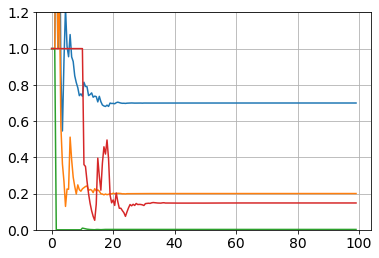

In [37]:
x0 = np.array((1., 1., 1., 1.))
xs, uxs = kfmsir.sir2c_kf(ts, ns, x0, N)
plt.plot(ts[:-1], xs);
plt.grid();
print('x-best : ', xs[190]); plt.ylim(0., 1.2);
print('x-true : ', xt)